# Retinex algorithm


## i) Single Scale Retinex
        Here, we use a single scale retinex algorithm to enhance the image. Retinex theory (Edwin H Land and co) deals with how human eye percieves images - the color of the image does not depend on the illuminance of the scene. The retinex algorithm uses this copncept to improve brightness, contrast and sharpness of an image. Retinex provides automatic dynamic range compression i.e., the ability to represent large input dynamic range into relatively small output dynamic range (by using log)Certain scenes violate the “gray-world" assumption, which requires that the average reflectance in the ‘surround’ be equal in the three spectral color bands. For example, scenes that are dominated by color/monochromes clearly violate this assumption and are forced to be gray by the Retinex computation.

##### Importing the image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("OG.jpg", 1)
plt.imshow(image)

##### Basic retiex algorithm class
    here we define a gaussian mask of same size as image and multiply them to obtain a gaussian of the image. We subtract the log of this quantity from the log of the original image to obtain the modified image. The varience of th gaussian is given as input. We then scale the result to the range 0-255 (8-bit image).

In [2]:
class BasicRetinexAlgo:

    def __init__(self, spread):
        self.spread = spread

    def basic_retinex(self, image):
        (n, m) = image.shape
        modified_image = np.zeros([n, m])
        for i in range(n):
            for j in range(m):
                gamma_square = i ** 2 + j ** 2
                power = float(gamma_square) / self.spread ** 2
                modified_image[i][j] = float(np.log((1 + image[i][j])) - np.log(1 + (image[i][j] * np.exp(-(power)))))

        factor = (255 / (np.amax(modified_image) - np.amin(modified_image)))
        processed_image = np.multiply(modified_image, factor).astype(int)
        return processed_image

Here, we split the color channels - Red, green and blue channels of the image

In [3]:
b, g, r = cv2.split(image)

###### Red channel

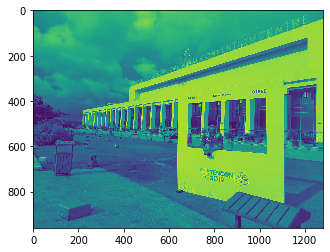

In [4]:
plt.imshow(r)

###### Green channel

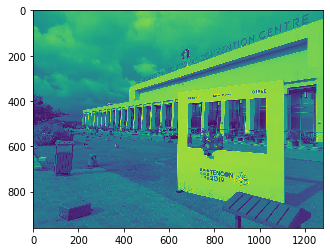

In [5]:
plt.imshow(g)

###### Blue channel 

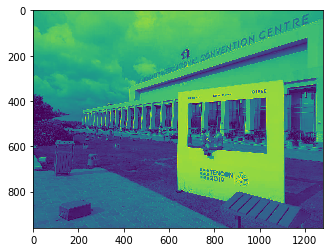

In [6]:
plt.imshow(b)

Creating Retinex class with variance given as input taken from the user The higher the sigma value, highrer will be the loss of color information as can be seen later

In [7]:
basrex = BasicRetinexAlgo(int(input("Enter varience value : ")))

Enter varience value : 45


Applying retinex to each channel seperately

In [8]:
r_modifiedimage = basrex.basic_retinex(r)
g_modifiedimage = basrex.basic_retinex(g)
b_modifiedimage = basrex.basic_retinex(b)

Combining the channels to obtain the final image

In [9]:
final_image = cv2.merge((b_modifiedimage,g_modifiedimage, r_modifiedimage, ))

We can see that though there is an increase in contrast, independence from illuminance and compression in dynamic range, there is significant loss of color information

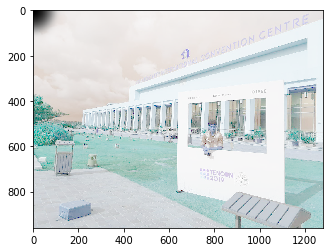

In [10]:
plt.imshow(final_image)

In [11]:
cv2.imwrite('output.jpeg', final_image)

True

To correct this drawback, we use multiscale retinex

## ii) Multiscale Rertinex 
        Here, Single scale retinex is applied multiple times seperately on the same image, with different sigma values each time. Then we combine (linear addition) the results after multiplying them with a suitable factor ( 1/number of times applied) 

First SSR application

In [12]:
basrexa = BasicRetinexAlgo(int(input("Enter varience value : ")))
r_modifiedimagea = basrexa.basic_retinex(r)
g_modifiedimagea = basrexa.basic_retinex(g)
b_modifiedimagea = basrexa.basic_retinex(b)

Enter varience value : 30


Second application of SSR

In [ ]:
basrexb = BasicRetinexAlgo(int(input("Enter varience value : ")))
r_modifiedimageb = basrexb.basic_retinex(r)
g_modifiedimageb = basrexb.basic_retinex(g)
b_modifiedimageb = basrexb.basic_retinex(b)

Third SSR

In [18]:
basrex = BasicRetinexAlgo(int(input("Enter varience value : ")))
r_modifiedimagec = basrex.basic_retinex(r)
g_modifiedimagec = basrex.basic_retinex(g)
b_modifiedimagec = basrex.basic_retinex(b)


Enter varience value : 20


Now we combine the individual images into 3 complete images. The resulting images of these 3 iterations are shown

In [36]:
final_imagea = cv2.merge((b_modifiedimagea, g_modifiedimagea, r_modifiedimagea))
final_imageb = cv2.merge((b_modifiedimageb, g_modifiedimageb, r_modifiedimageb))
final_imagec = cv2.merge((b_modifiedimagec, g_modifiedimagec, r_modifiedimagec))

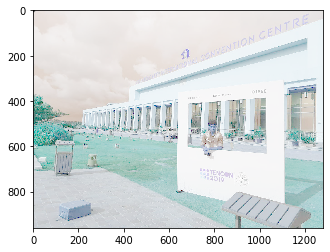

In [37]:
plt.imshow(final_imagea)

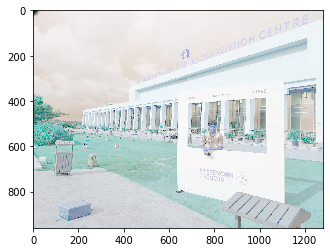

In [38]:
plt.imshow(final_imageb)

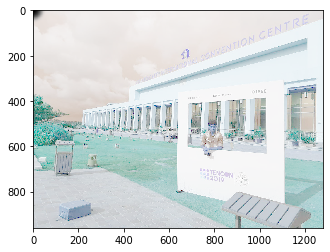

In [39]:
plt.imshow(final_imagec)

Combining the images after multiplying with a factor of 1/3 as we have used 3 applications

In [40]:
final_image=(1/3)*(final_imagea+final_imageb+final_imagec)

The final image

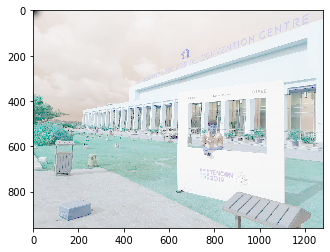

In [41]:
plt.imshow(final_image.astype(int))

In [42]:
cv2.imwrite('output2.jpeg', final_image)

True